# Исследовательский анализ концепции нового заведения общественного питания

- Автор: Чернышова О.В.
- Дата: 09.11.2025г.

### Цели и задачи проекта

<font color='#777778'>Цель - провести исследовательский анализ рынка Москвы для концепции нового заведения общественного питания. Эти результаты помогут в выборе подходящего инвесторам места.</font>

### Описание данных

<font color='#777778'>  содержит информацию о заведениях общественного питания:
- id
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 
- 0 — заведение не является сетевым;
- 1 — заведение является сетевым.
- seats — количество посадочных мест.</font>


<font color='#777778'> содержит информацию о среднем чеке в заведениях общественного питания:
- id
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — хранит среднюю стоимость заказа в виде диапазона, например: 
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: 
    
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
    
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill,

начинающихся с подстроки «Цена одной чашки капучино»: 
    
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

<font color='#777778'>
    
    1. Загрузка данных и знакомство с ними 
       Промежуточный вывод
       Подготовка единого датафрейма
    2. Предобработка данных
       Промежуточный вывод
    3. Исследовательский анализ данных
       Задача 1
       Задача 2
       Задача 3
       Задача 4
       Задача 5
       Задача 6
       Задача 7
       Задача 8
    4. Итоговый вывод и рекомендации.</font>

---

## 1. Загрузка данных и знакомство с ними


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik 

In [5]:
!pip install phik
!pip install scipy

- Познакомьтесь с данными и изучите общую информацию о них.

In [8]:
# Выводим информацию /datasets/rest_info.csv 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [9]:
# Выводим информацию /datasets/rest_price.csv.
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [10]:
print(df_1.shape)

(8406, 9)


In [11]:
print(df_2.shape)

(4058, 5)


---

### Промежуточный вывод



Вывод о полученных данных:
    
Были загружены данные  ` .

Они содержат 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

При первичном знакомстве с данными и их предобработкой получили такие результаты:

В двух столбцах ('hours', 'seats') были обнаружены пропущенные значения.

Используются неверные типы данных в столбце 'seats'- float64 всвязи с тем, что в столбце 'seats' присутствуют пропущенные значения (NaN), которые нельзя преобразовать в целочисленный тип int64. Оставим пока как есть.


Также загружены данные  ` `.

Они содержат 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

При первичном знакомстве с данными и их предобработкой получили такие результаты:

В четырех столбцах ('price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup') были обнаружены пропущенные значения.

Используются не очень удобный тип данных в столбце 'avg_bill'- object.

### Подготовка единого датафрейма



In [12]:
# Присоедините датафреймы с помощью метода merge()
df_merged = df_1.merge(df_2, how='left', on='id')
print(df_merged.head())

                                 id                  name  category  \
0  0c3e3439a8c64ea5bf6ecd6ca6ae19f0                WoWфли      кафе   
1  045780ada3474c57a2112e505d74b633        Четыре комнаты  ресторан   
2  1070b6b59144425896c65889347fcff6                 Хазри      кафе   
3  03ac7cd772104f65b58b349dc59f03ee  Dormouse Coffee Shop   кофейня   
4  a163aada139c4c7f87b0b1c0b466a50f             Иль Марко  пиццерия   

                               address                         district  \
0           Москва, улица Дыбенко, 7/1  Северный административный округ   
1   Москва, улица Дыбенко, 36, корп. 1  Северный административный округ   
2       Москва, Клязьминская улица, 15  Северный административный округ   
3  Москва, улица Маршала Федоренко, 12  Северный административный округ   
4      Москва, Правобережная улица, 1Б  Северный административный округ   

                                               hours  rating  chain  seats  \
0                             ежедневно, 10:

In [13]:
print(df_merged.shape)

(8406, 13)


## 2. Предобработка данных



In [14]:
# Выводим информацию
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [15]:
# Считаем пропуски 
df_merged.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [16]:
# Посмотрим пропуски
missing_data_address = df_merged[df_merged['middle_avg_bill'].isna()]
print(missing_data_address.head(30))

                                  id                          name  \
0   0c3e3439a8c64ea5bf6ecd6ca6ae19f0                        WoWфли   
3   03ac7cd772104f65b58b349dc59f03ee          Dormouse Coffee Shop   
5   8a343546b24e4a499ad96eb7d0797a8a                  Sergio Pizza   
10  ac32978af97641bfacf996e7f5a50ee5                Great Room Bar   
11  53ac103717c142f29907080db1f0ce58                   Шашлык Шефф   
13  aea18265b0a0415893f1e796b82568fe                       Буханка   
19  feec6bedccae44cb877d99c13f9aa5d7                       Пекарня   
20  1ab5691e4da844d3abadf085e0957852                Чебуреки Манты   
21  3483fb839c134fc89e15a1da83053498                          7/12   
22  66274ec5b26440e389aa3584b5cc2e9c             Крымские чебуреки   
23  78709462f2b3480f825489a5321a3563                       Буханка   
24  0f5d22f5377340d0a81a9328e6ebdcac                    Drive Café   
25  f8b3518cd2874826a9b1cceb006039bc               В парке вкуснее   
30  a5536f9643c94da1

In [17]:
# посмотрим пропуски по категиям заведений
missing_values_by_category = df_merged.groupby('category').apply(lambda x: x.isna().sum())
print("Количество пропущенных значений по категориям:")
print(missing_values_by_category)

Количество пропущенных значений по категориям:
                 id  name  category  address  district  hours  rating  chain  \
category                                                                       
бар,паб           0     0         0        0         0     18       0      0   
булочная          0     0         0        0         0      7       0      0   
быстрое питание   0     0         0        0         0     33       0      0   
кафе              0     0         0        0         0    375       0      0   
кофейня           0     0         0        0         0     15       0      0   
пиццерия          0     0         0        0         0      5       0      0   
ресторан          0     0         0        0         0     74       0      0   
столовая          0     0         0        0         0      9       0      0   

                 seats  price  avg_bill  middle_avg_bill  middle_coffee_cup  
category                                                                  

In [18]:
# Подсчитываем долю строк с пропусками
print(df_merged.isna().sum() / len(df_merged))

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64


В большом количестве отсутствует информация о среднем чеке, количестве мест, среднем чеке за чашку кофе у категории - кафе. Посмотрим адреса заведений, где пропушены значения по количеству мест. Мы видим, что заведения находятся либо в торговых центрах, либо в торговых павильонах, также распологаются в жилых домах. Возможно заведения не очень большие. Количество мест в данных кафе есть, но мы не знаем сколько. Строки с пропусками оставим как есть.

In [19]:
# делаем осмотр значений, ведь могут быть опечатки или похожего рода ошибки.
for column in ['name','category','address','district', 'hours', 'rating', 'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_merged[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; 

In [20]:
# Названия заведений привеодим к нижнему регистру 
def process_column(column):
    return column.str.lower().str.replace(" ", "_").str.strip()

# Применяем функцию к нужным столбцам
columns_to_process = ['name', 'address']
df_merged[columns_to_process] = df_merged[columns_to_process].apply(process_column) 

In [21]:
# Необходимо также избавиться от лишних пробелов в начале и в конце строки, которые могут создавать дубликаты
def strip_columns(df, columns):
    for column in columns:
        df[column] = df[column].str.strip()
    return df

# Список столбцов, которые нужно обработать
columns_to_strip = ['name', 'address']

# Применяем функцию к датафрейму
df_merged = strip_columns(df_merged, columns_to_strip)

In [22]:
# создаем столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7
df_merged.loc[:, 'is_24_7'] = df_merged.apply(
    lambda row: True if ('круглосуточно' in str(row['hours'])) or ('ежедневно, круглосуточно' in str(row['hours'])) else False, axis=1)

In [23]:
# Выводим информацию
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8406 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 927.6+ KB


In [24]:
# Определяем количество уникальных значений в столбце 'name'
unique_name_count = df_merged['name'].nunique()
print("Количество уникальных значений в столбце 'name':", unique_name_count) 

Количество уникальных значений в столбце 'name': 5512


In [25]:
# Определяем количество уникальных значений в столбце 'address'
unique_name_count = df_merged['address'].nunique()
print("Количество уникальных значений в столбце 'address':", unique_name_count) 

Количество уникальных значений в столбце 'address': 5752


In [26]:
# Сохраняем количество строк до удаления дубликатов
initial_row_count = df_merged.shape[0]

# Сортируем датафрейм по всем столбцам
df_merged_sorted = df_merged.sort_values(by=list(df_merged.columns))

# Удаляем дубликаты
df_merged_no_duplicates = df_merged_sorted.drop_duplicates(subset=['name', 'address', 'category'])

# Сохраняем количество строк после удаления дубликатов
final_row_count = df_merged_no_duplicates.shape[0]

# Выводим результаты
print(f"Количество строк до удаления дубликатов: {initial_row_count}")

print(f"Количество строк после удаления дубликатов: {final_row_count}")

duplicates_removed = initial_row_count - final_row_count

duplicates_share = duplicates_removed / initial_row_count

print(f"Количество удаленных дубликатов: {duplicates_removed}")

print(f"Доля удаленных дубликатов: {duplicates_share:.2%}")

Количество строк до удаления дубликатов: 8406
Количество строк после удаления дубликатов: 8404
Количество удаленных дубликатов: 2
Доля удаленных дубликатов: 0.02%


In [27]:
# Считаем количесвто заведений по столбцу 'is_24_7'
count_is_24_7 = df_merged_no_duplicates['is_24_7'].sum()
print(f"Количество заведений, работающих 24/7: {count_is_24_7}")


Количество заведений, работающих 24/7: 772


---

### Промежуточный вывод

в данных большое количество пропущенных значений

- hours                 536
- seats                3611
- price                5091
- avg_bill             4590
- middle_avg_bill      5257
- middle_coffee_cup    7871

Разберем столбец ' seats'. Ищем по адресу заведений информацию в интернети  мы видим, что находятся они либо в торговых центрах, либо в торговых павильонах, в жилых домах. Количество мест в данных кафе есть, но мы не знаем сколько. Поэтому заполнить пропущенные значения не представляется возможным.


Для достижения большей точности при дальнейших расчетах, мы проверели предварительную обработку данных:
нормализация данных с текстовыми значениями.

После нормализация данных по столбцам 'name', 'address', 'category' были обнаружены и удалены 2 дубликата.

## 3. Исследовательский анализ данных


кафе               2377
ресторан           2042
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

доля значений в столбце 'category':
кафе               0.282842
ресторан           0.242980
кофейня            0.168134
бар,паб            0.091028
пиццерия           0.075321
быстрое питание    0.071752
столовая           0.037482
булочная           0.030462
Name: category, dtype: float64


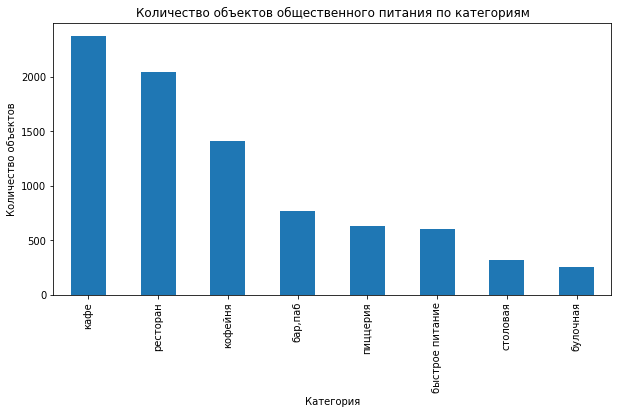

In [28]:
categories = df_merged_no_duplicates['category'].value_counts()

# Выводим количество объектов по каждой категории

print(categories)
print("\nдоля значений в столбце 'category':")
print(df_merged_no_duplicates['category'].value_counts(normalize=True))

# Создаём столбчатую диаграмму для визуализации
categories.plot(kind='bar', figsize=(10, 5))
plt.title('Количество объектов общественного питания по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
plt.show()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

доля значений в столбце 'district':
Центральный административный округ         0.266778
Северный административный округ            0.106854
Южный административный округ               0.106140
Северо-Восточный административный округ    0.106021
Западный административный округ            0.101261
Восточный административный округ           0.094955
Юго-Восточный административный округ       0.084960
Юго-Западный административный округ        0.084365
Северо-Западный административный округ     0.048667
Name: district, dtype: float64


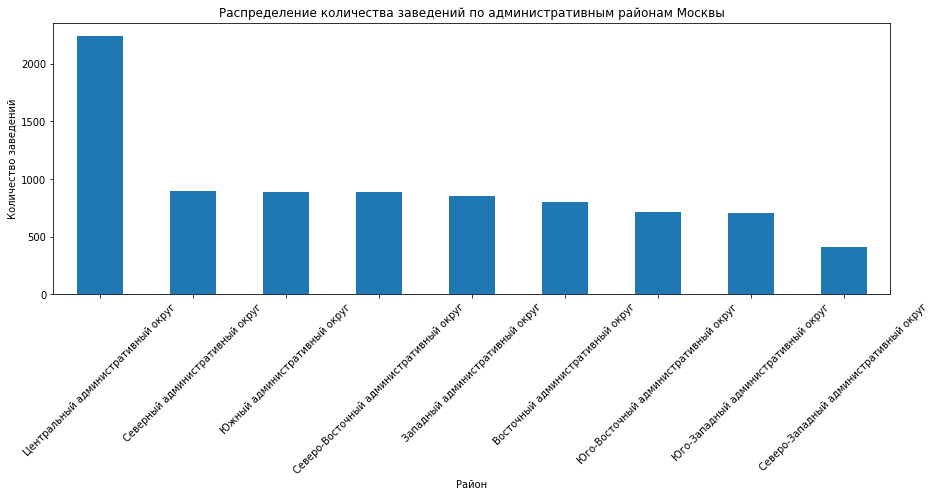

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64
ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: category, dtype: float64


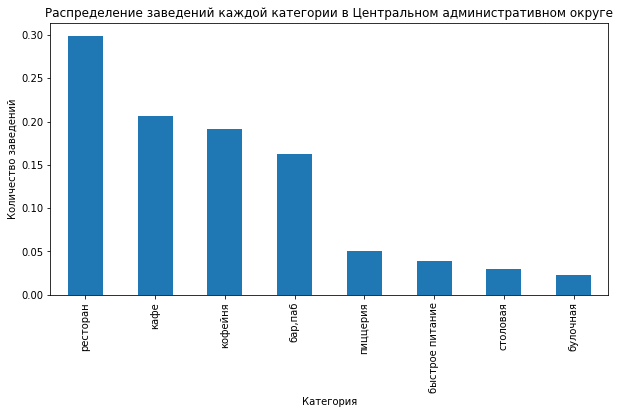

In [36]:
# Распределение количества заведений по административным районам
district_counts = df_merged_no_duplicates['district'].value_counts()
print(district_counts)


print("\nдоля значений в столбце 'district':")
print(df_merged_no_duplicates['district'].value_counts(normalize=True))

# Визуализация распределения заведений по районам
district_counts.plot(kind='bar', figsize=(15, 5))
plt.title('Распределение количества заведений по административным районам Москвы')
plt.xlabel('Район')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)  # Поворачиваем названия районов для лучшей читаемости
plt.show()

# Фильтруем данные для Центрального административного округа (ЦАО)
ca_data = df_merged_no_duplicates[df_merged_no_duplicates['district'] == 'Центральный административный округ']
 

# Распределение заведений каждой категории в ЦАО
category_counts_ca = ca_data['category'].value_counts()
print(category_counts_ca)

# Распределение заведений каждой категории в ЦАО с подсчётом доли
category_counts_ca = ca_data['category'].value_counts(normalize=True)
print(category_counts_ca)
 

# Визуализация распределения заведений каждой категории в ЦАО
category_counts_ca.plot(kind='bar', figsize=(10, 5))
plt.title('Распределение заведений каждой категории в Центральном административном округе')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.show()

Наибольшее количество заведений по административным районам Москвы находятся в Центральном административном округе, меньше всего в Северо-Западном административный округе.

В Центральном административном округе больше всего из заведений это - рестораны, меньше всего булочных.

0    5200
1    3204
Name: chain, dtype: int64

доля значений в столбце 'chain':
0    0.618753
1    0.381247
Name: chain, dtype: float64


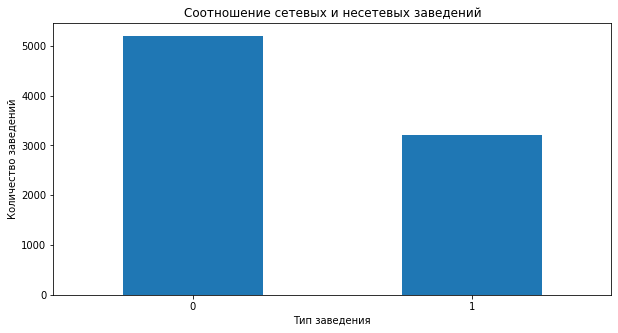

chain               0    1
category                  
бар,паб           596  169
булочная           99  157
быстрое питание   371  232
кафе             1598  779
кофейня           693  720
пиццерия          303  330
ресторан         1313  729
столовая          227   88
chain                   0         1
category                           
бар,паб          0.779085  0.220915
булочная         0.386719  0.613281
быстрое питание  0.615257  0.384743
кафе             0.672276  0.327724
кофейня          0.490446  0.509554
пиццерия         0.478673  0.521327
ресторан         0.642997  0.357003
столовая         0.720635  0.279365


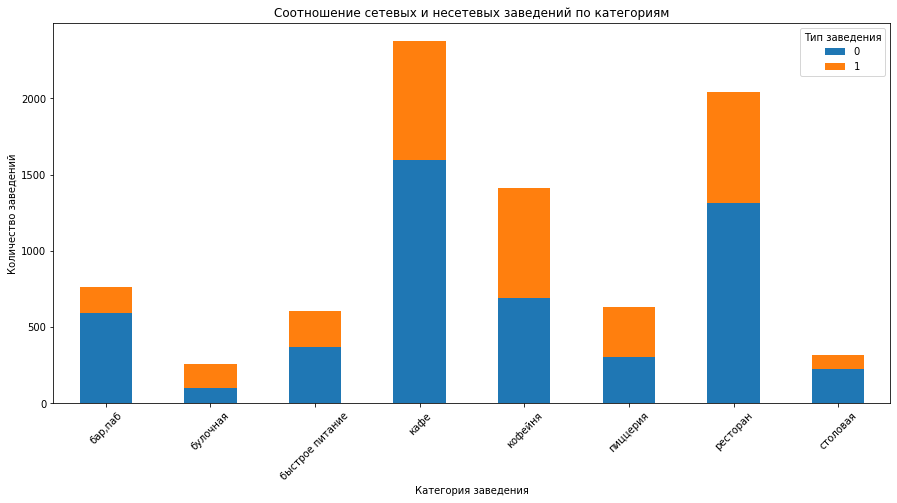

In [30]:
# Изучаем соотношение сетевых и несетевых заведений в целом
chain_counts = df_merged_no_duplicates['chain'].value_counts()
print(chain_counts)

print("\nдоля значений в столбце 'chain':")
print(df_merged_no_duplicates['chain'].value_counts(normalize=True))



# Визуализация соотношения сетевых и несетевых заведений, где 0 — заведение не является сетевым 1 — заведение является сетевым.
chain_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
plt.xticks(rotation=0)  # Поворачиваем названия районов для лучшей читаемости
plt.show()

# Исследуем соотношение сетевых и несетевых заведений по категориям по количеству
category_chain_counts = df_merged_no_duplicates.groupby('category')['chain'].value_counts().unstack() 
print(category_chain_counts)

# Исследуем соотношение сетевых и несетевых заведений по категориям в долях
category_chain_c = df_merged_no_duplicates.groupby('category')['chain'].value_counts(normalize=True).unstack()
print(category_chain_c)



# Визуализация соотношения сетевых и несетевых заведений по категориям
category_chain_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Соотношение сетевых и несетевых заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.legend(title='Тип заведения', loc='upper right')
plt.xticks(rotation=45)  # Поворачиваем названия категорий для лучшей читаемости
plt.show()

Больше всего несетывых заведений. Из сетевых больше всего - кафе. 

Количество пропущенных значений: 3610
Распределение количества посадочных мест (без NaN):
count    4794.000000
mean      108.405090
std       122.840831
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


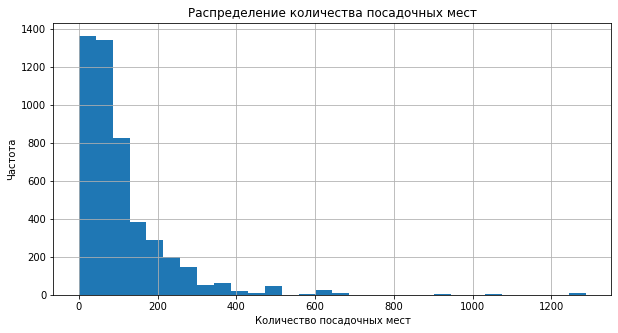

Аномальные значения:
                                  name         category   seats
6641                  one_price_coffee          кофейня  1288.0
6838                alternative_coffee          кофейня  1288.0
4245                    стейк_&_бургер             кафе   920.0
6658                            гудбар          бар,паб  1288.0
4231                рестобар_argomento         столовая  1200.0
5841                     for_your_kids             кафе   650.0
2722                         маргарита  быстрое питание  1040.0
2901                   ресторан_тройка          бар,паб   660.0
2770                       шоколадница          кофейня  1040.0
6574                            мюнгер         пиццерия  1288.0
6684                   пивной_ресторан          бар,паб  1288.0
2966                          матрешка             кафе  1040.0
6771                             точка             кафе  1288.0
5655                       the_fox_pub          бар,паб   650.0
6548               

<AxesSubplot:xlabel='category'>

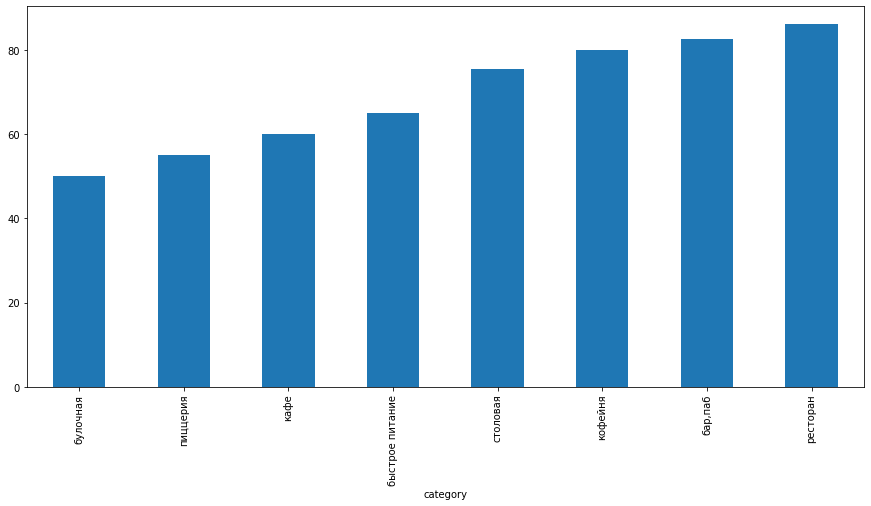

In [31]:
# Подсчитываем количество пропущенных значений в столбце 'seats'
missing_values = df_merged_no_duplicates['seats'].isna().sum()
print(f"Количество пропущенных значений: {missing_values}")

# Исследуем общее распределение количества посадочных мест, исключая пропуски
seats_distribution = df_merged_no_duplicates['seats'].dropna().describe()
print("Распределение количества посадочных мест (без NaN):")
print(seats_distribution)

# Визуализация распределения количества посадочных мест
plt.figure(figsize=(10, 5))
df_merged_no_duplicates['seats'].dropna().hist(bins=30)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.show()

# Проверяем наличие аномальных значений или выбросов
outliers = df_merged_no_duplicates[(df_merged_no_duplicates['seats'] > df_merged_no_duplicates['seats'].quantile(0.99))]
 
print("Аномальные значения:")
print(outliers[['name', 'category', 'seats']])

# Наиболее типичное количество посадочных мест для каждой категории, исключая NaN
typical_seats = df_merged_no_duplicates.groupby('category')['seats'].median().dropna().sort_values()
print("Наиболее типичное количество посадочных мест по категориям:")
print(typical_seats)

# Визуализация типичного количества посадочных мест по категориям
plt.figure(figsize=(15, 7))
typical_seats.plot(kind='bar')

В данных встречаются аномальные значения или выбросы. Они могут быть связаны с опечаткой, приписана лишняя цифра, скорее всего нажали два раза на цифру вместо одного раза. 

Наиболее типичное количество посадочных мест по категориям:
- булочная           50.0
- пиццерия           55.0
- кафе               60.0
- быстрое питание    65.0
- столовая           75.5
- кофейня            80.0
- бар,паб            82.5
- ресторан           86.0

category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124274
быстрое питание    4.050249
Name: rating, dtype: float64


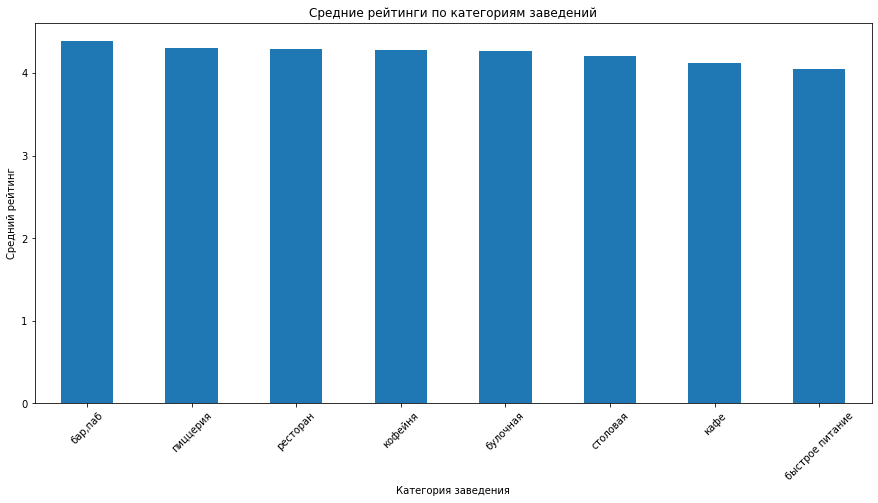

In [32]:
# Рассчитываем средний рейтинг для каждой категории заведений
average_ratings = df_merged_no_duplicates.groupby('category')['rating'].mean().sort_values(ascending=False)
print(average_ratings)

# Визуализация распределения средних рейтингов по категориям
plt.figure(figsize=(15, 7))
average_ratings.plot(kind='bar')
plt.title('Средние рейтинги по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)  # Поворачиваем названия категорий для лучшей читаемости
plt.show()

Немного различаются усреднённые рейтинги для разных типов общепита:

- бар,паб            4.387712
- пиццерия           4.301264
- ресторан           4.290357
- кофейня            4.277282
- булочная           4.268359
- столовая           4.211429
- кафе               4.123886
- быстрое питание    4.050249

interval columns not set, guessing: ['rating', 'chain', 'seats']
            rating  category  district     chain     seats     price   is_24_7
rating    1.000000  0.189779  0.200760  0.107786  0.000000  0.220295  0.144895
category  0.189779  1.000000  0.174433  0.265649  0.047743  0.566933  0.230238
district  0.200760  0.174433  1.000000  0.064234  0.352709  0.202787  0.065890
chain     0.107786  0.265649  0.064234  1.000000  0.056258  0.218211  0.050698
seats     0.000000  0.047743  0.352709  0.056258  1.000000  0.088146  0.038204
price     0.220295  0.566933  0.202787  0.218211  0.088146  1.000000  0.066287
is_24_7   0.144895  0.230238  0.065890  0.050698  0.038204  0.066287  1.000000


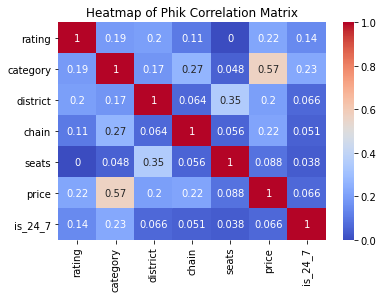

In [33]:
columns_of_interest = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']
df_filtered = df_merged_no_duplicates[columns_of_interest]
correlation_matrix = df_filtered.phik_matrix()
print(correlation_matrix)
# Визуализируем
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Phik Correlation Matrix')
plt.show()

Корреляция между переменной category и price составляет 0.57, что свидетельствует о умеренная корреляции между ценой и категорией заведения.	От 0.3 до 0.7 — умеренная корреляция: существует взаимосвязь, но она не очень сильная.

                                    name  count  average_rating  category
727                          шоколадница    120        4.177500   кофейня
335                       домино'с_пицца     76        4.169737  пиццерия
331                           додо_пицца     74        4.286486  пиццерия
147                     one_price_coffee     71        4.064789   кофейня
741                         яндекс_лавка     69        3.872464  ресторан
58                                 cofix     65        4.075385   кофейня
168                                prime     50        4.116000  ресторан
409                             кофепорт     42        4.147619   кофейня
418  кулинарная_лавка_братьев_караваевых     39        4.394872      кафе
628                              теремок     38        4.123684  ресторан
267                              буханка     32        4.396875  булочная
39                              cofefest     32        3.984375   кофейня
477                                му-

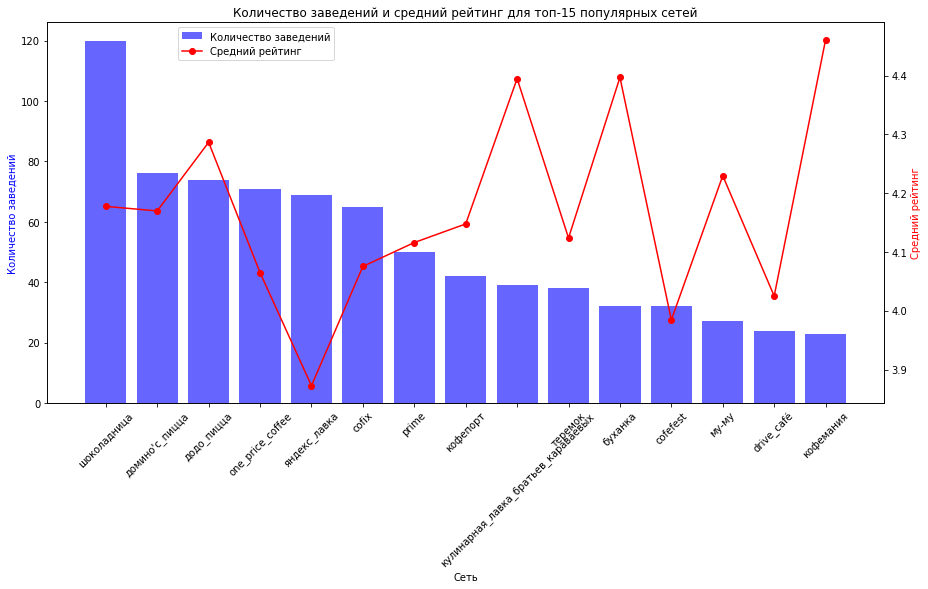

In [34]:
# Фильтруем данные по условию chain = 1 и исключаем определённые названия
filtered_df = df_merged_no_duplicates[(df_merged_no_duplicates['chain'] == 1) & 
                                      ~df_merged_no_duplicates['name'].isin(['хинкальная', 'чайхана'])]

# Приводим все названия к нижнему регистру
# filtered_df.loc[:, 'name'] = filtered_df['name'].str.lower()

# Группируем данные по названиям заведений и считаем количество заведений для каждой сети
chains_grouped = filtered_df.groupby(['name']).size().reset_index(name='count')

# Считаем средний рейтинг для каждой сети
average_ratings = filtered_df.groupby('name')['rating'].mean().reset_index(name='average_rating')

# Объединяем данные о количестве заведений и среднем рейтинге
result = pd.merge(chains_grouped, average_ratings, on='name')

# Сортируем результат по количеству заведений
result = result.sort_values(by='count', ascending=False)

# Находим категории для каждой из сетей
top_chains_categories = []
for chain in result['name']:
    category = filtered_df[filtered_df['name'] == chain]['category'].iloc[0]
    top_chains_categories.append(category)

result['category'] = top_chains_categories

# Выбираем топ-15 сетей
top_15 = result.head(15)

print(top_15)

# Создаём график с двумя осями
fig, ax1 = plt.subplots(figsize=(15, 7))
# Строим график количества заведений
ax1.bar(top_15['name'], top_15['count'], color='b', alpha=0.6, label='Количество заведений')
ax1.set_xlabel('Сеть')
ax1.set_ylabel('Количество заведений', color='b')

# Вторая ось для среднего рейтинга
ax2 = ax1.twinx()
ax2.plot(top_15['name'], top_15['average_rating'], 'ro-', label='Средний рейтинг')
ax2.set_ylabel('Средний рейтинг', color='r')

# Легенда
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.15, 1))

plt.title('Количество заведений и средний рейтинг для топ-15 популярных сетей')

# Устанавливаем метки и поворачиваем их
ax1.set_xticks(range(len(top_15)))
ax1.set_xticklabels(top_15['name'], rotation=45)

plt.show()

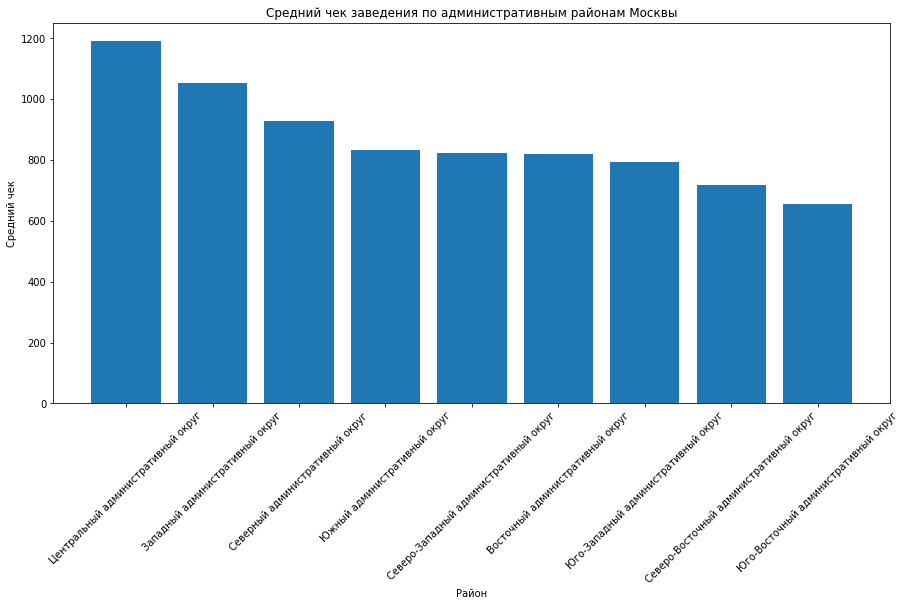

Средний чек в Центральном административном округе: 1191.06


In [35]:
# Группируем данные по районам и вычисляем среднее значение среднего чека
average_bills_by_district = df_merged_no_duplicates.groupby('district')['middle_avg_bill'].mean().reset_index()

# Сортируем районы по среднему чеку для наглядности
average_bills_by_district.sort_values(by='middle_avg_bill', ascending=False, inplace=True)

# Визуализация среднего чека по районам
plt.figure(figsize=(15, 7))
plt.bar(average_bills_by_district['district'], average_bills_by_district['middle_avg_bill'])
plt.title('Средний чек заведения по административным районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)  # Поворачиваем названия районов для лучшей читаемости
plt.show()

# Отдельно анализируем цены в Центральном административном округе
central_district_data = df_merged_no_duplicates[df_merged_no_duplicates['district'] == 'Центральный административный округ']
average_bill_central = round(central_district_data['middle_avg_bill'].mean(), 2)
print(f"Средний чек в Центральном административном округе: {average_bill_central}")
 

Средний чек в Центральном административном округе: 1191.06, чем дальше от центра, тем меньше Средний чек. В Юго-Восточном административном округев цены в заведениях около 700 руб.

---

### Промежуточный вывод

В данных встречаются аномальные значения или выбросы. Они могут быть связаны с опечаткой. В расчетах мы отфильтровали аномальные значения или выбросы.

в данных большое количество пропущенных значений

- hours                 536
- seats                3611
- price                5091
- avg_bill             4590
- middle_avg_bill      5257
- middle_coffee_cup    7871

Пропуски мы не заполняли. Исследуем общее распределение количества посадочных мест мы исключали пропуски.



## 4. Итоговый вывод и рекомендации

Были загружены данные /datasets/rest_info.csv.

Они содержат 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

Также загружены данные /datasets/rest_price.csv.

Они содержат 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.


При первичном знакомстве с данными и их предобработкой получили такие результаты:

в шести столбцах были обнаружены пропущенные значения в таких долях:

- hours                0.063764
- seats                0.429574
- price                0.605639
- avg_bill             0.546039
- middle_avg_bill      0.625387
- middle_coffee_cup    0.936355

Для оптимизации работы с данными в датафрейме были проведена предобработка данных: провели нормализация данных с текстовыми значениями, удалили 2 строки с дубликатами.

Сохранен новый срез в отдельном датафрейме df_merged_no_duplicates.
1. количество объектов общественного питания по каждой категории
2. распределение количества заведений по административным районам Москвы, 
   также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.
3. Изучили соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 
4. Привели для каждой категории заведений наиболее типичное для него количество посадочных мест.
5. Визуализировали распределение средних рейтингов по категориям заведений
6. с какими данными показывают самую сильную корреляцию рейтинги заведений
7. топ-15 популярных сетей в Москве
8. средний чек заведения (столбец middle_avg_bill) в зависимости от района Москвы.

На основе анализа следует обратить внимание на сетевые заведения заведения с большим рейтингом и меньшие по количеству, таких как:
- 'теремок', 
- 'кулинарная_лавка_братьев_караваевых',
- 'кофемания' .

Наибольший Средний чек в Центральном административном округе: 1191.06 руб.